<a href="https://colab.research.google.com/github/sohamphanseiitb/coursework-iitb/blob/main/STATS570_Final_Exam_Preparation_Soham_Phanse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
!pip install statsmodels

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import f
import statsmodels.api as sm
from scipy.stats import t
from sklearn.linear_model import LinearRegression

# Unit 15: Residual Analysis

## Residual Plots

In [102]:
# data is the data matrix stacked, in this case, rows A, B, C, D are stacked on top of each other
# number of rows indicate the number of levels of  factor and number of columns indicate the number of experiments conducted per factor
def residual_plot(data):

  s1, s2 = data.shape
  Y1 = data
  Y = data.T.reshape(-1, 1)

  X1 = np.eye(s1)
  X2 = X1
  for i in range(s2-1):
    X2 = np.vstack((X2, X1))

  X = np.column_stack((np.ones(X2.shape[0]), X2))
  Xnew = np.delete(X, 1, 1)

  bX = np.dot(np.dot(np.linalg.inv(np.dot(Xnew.T, Xnew)), Xnew.T), Y)
  ypred = np.zeros(s1)
  ypred[0] = bX[0][0]
  for j in range(1, s1):
    ypred[j] = bX[0][0] + bX[j][0]

  # Residual Plot
  residual = np.zeros_like(data)
  plt.figure(1)
  for i in range(Y1.shape[0]):
    for j in range(Y1.shape[1]):
      plt.scatter(ypred[i], Y1[i, j]-ypred[i])
      residual[i, j] = Y1[i, j]-ypred[i]

  plt.xlabel('Y predicted from LSE')
  plt.ylabel('Residual (Y observed - Y predicted)');
  plt.title('Residual Plot');

  # Normal plot
  residual_vec = residual.reshape(-1, 1)
  # Q-Q plot
  fig, ax = plt.subplots(figsize=(8, 6))
  sm.qqplot(residual_vec, line ='45', ax=ax)
  plt.title('Q-Q Plot of Residuals')
  plt.show()

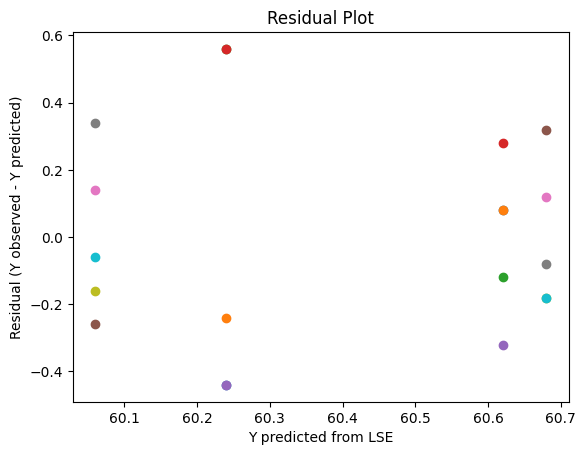

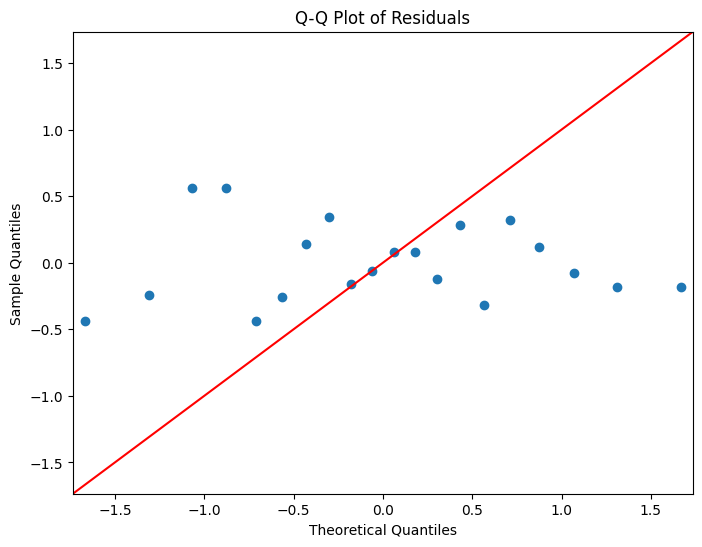

In [103]:
#pulp experiment data
A = np.array([59.8, 60.0, 60.8, 60.8, 59.8])
B = np.array([59.8, 60.2, 60.4, 59.9, 60.0])
C = np.array([60.7, 60.7, 60.5, 60.9, 60.3])
D = np.array([61.0, 60.8, 60.6, 60.5, 60.5])

Y1 = np.array([A, B, C, D])
residual_plot(Y1)

# Unit 16: Graphical Tools

## Box Whisker plots

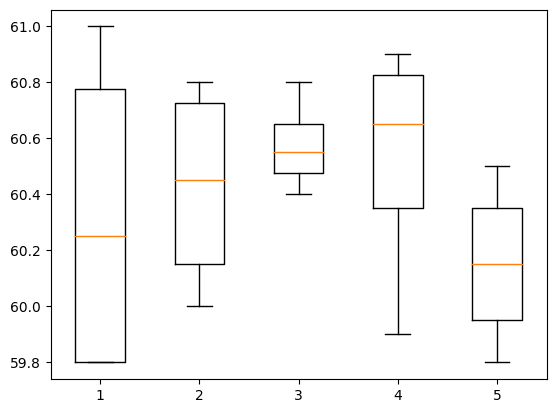

In [104]:
plt.boxplot(Y1);

# Unit 17: Two Way layout models

## Bolt Experiment

### Data

In [105]:
data1 = np.array([[20, 16 ,17, 18, 15, 16, 19, 14, 15, 24, 26, 40, 28, 38, 38, 30, 26, 38, 45, 38, 25, 40, 30, 17, 16, 45, 49, 33, 30, 20], [24, 18, 17, 17, 15, 23, 14, 18, 12, 11, 32, 22, 30, 35, 32, 28, 27, 28, 30, 30, 10, 13, 17, 16, 15, 14, 11, 14, 15, 16]])

### Data Recasting, Boilerplate code

In [106]:
treat1 = np.array(['bolt', 'mandrel'])
treat2 = np.array(['CW', 'HT', 'PO'])
lt1, lt2, n = len(treat1), len(treat2), 10
sum1, prod = lt1+lt2, lt1*lt2
main_effects = np.zeros(sum1)
inte_effects = np.zeros((lt1, lt2))
residuals = np.zeros((lt1, lt2, n))
data_recast = np.zeros((lt1, lt2, n))

for i in range(2):
  for j in range(3):
    data_recast[i, j] = data1[i, j*10:(j+1)*10]

### Grand mean and Main Effects calculations

In [107]:
grand_mean = np.mean(data_recast.reshape(-1, 1))

# main effects calculations
for i in range(sum1):
   # these are the first factor main effects
  if i <lt1:
    main_effects[i] = np.mean(data_recast[i, :, :].reshape(-1, 1)) - grand_mean
  else:
    main_effects[i] = np.mean(data_recast[:, i-len(treat1), :].reshape(-1, 1)) - grand_mean

### Interaction effects and Residuals calculations

In [108]:
# interaction effects calculations
for i in range(lt1):
  for j in range(lt2):
    yijdot = np.mean(data_recast[i, j, :].reshape(-1, 1))
    inte_effects[i, j] = yijdot - main_effects[i] - main_effects[j+lt1] + grand_mean
    for k in range(n):
      residuals[i, j, k] = data_recast[i, j, k] - yijdot

### Sum of Squares : Main Effects

In [109]:
sumA, sumB = 0, 0
for k in range(lt1):
  sumA += lt2*n*main_effects[k]**2

for k in range(lt1, lt1+lt2):
  sumB += lt1*n*main_effects[k]**2

### Sum of Squares: Interaction Effects

In [110]:
sumAB = 0
for m in range(lt1):
  for q in range(lt2):
    sumAB += n*(inte_effects[m, q]**2)

### Sum of Squares: Residuals and Total

In [111]:
sumR, sumT = 0, 0
for i in range(lt1):
  for j in range(lt2):
    for k in range(n):
      sumR += residuals[i, j, k]**2
      sumT += (data_recast[i, j, k] - grand_mean)**2

### ANOVA Calculations

In [112]:
MSA = sumA/(lt1-1)
MSB = sumB/(lt2-1)
MSAB = sumAB/((lt1-1)*(lt2-1))
MSR = sumR/(lt1*lt2*(n-1))
FA0 = MSA/MSR
FB0 = MSB/MSR
FAB0 = MSAB/MSR
pA, pB, pAB = 1 - f.cdf(FA0, lt1-1, lt1*lt2*(n-1)), 1 - f.cdf(FB0, lt2-1, lt1*lt2*(n-1)), 1 - f.cdf(FAB0, (lt1-1)*(lt2-1), lt1*lt2*(n-1))

# Unit 18: Two Way Layout Models (III)

# Unit 19: Randomized Block Design

## Sewage Experiment
| Sample | MSI | SIB | Diff |
| ------ | ---- | ---- | -----|
| 1 | 0.39 | 0.36 | −0.03
| 2 | 0.84 | 1.35 | 0.51
| 3 | 1.76 | 2.56 | 0.80
| 4 | 3.35 | 3.92 | 0.57
| 5 | 4.69 | 5.35 | 0.66
| 6 | 7.70 | 8.33 | 0.63
| 7 | 10.52 | 10.70 | 0.18
| 8 |10.92 | 10.91 | −0.01

The two treatments are declared significantly different at level $α$ if
$| t_{paired} | > t_{N−1,α/2} $

In [113]:
msi = np.array([0.39, 0.84, 1.76, 3.35, 4.69, 7.70, 10.52, 10.92]).T
sib = np.array([0.36, 1.35, 2.56, 3.92, 5.35, 8.33, 10.7, 10.91]).T
dif = sib-msi
mat = np.column_stack((msi, sib,dif))
difmen, difvar = np.mean(dif), np.std(dif)**2
N = len(dif)
alpha = 0.05 #95% level of significance

### Paired T test

In [114]:
tpaired = np.sqrt(N)*difmen/np.sqrt(difvar)
t_value_paired = t.ppf(1 - alpha / 2, N-1)
p_value_paired = 1 - t.cdf(tpaired, N-1)

### Unpaired T test

In [115]:
y1mean, y2mean = np.mean(msi), np.mean(sib)
y1var, y2var = np.var(msi), np.var(sib)
tunpaired = (y2mean-y1mean)/np.sqrt((y1var+y2var)/N)
t_value_unpaired = t.ppf(1 - alpha/2, (2*N)-2)
p_value_unpaired = t.cdf(tunpaired, 2*N-2)

- At $\alpha$=0.05 level, the unpaired $t$ test fails, but paired $t$ test passes.
- F statistic in ANOVA for paired design equals $t^2_{paired}$ and similarly for unpaired design.

### Girder Design

In [116]:
aarau = np.array([0.772, 0.744, 0.767, 0.745, 0.725, 0.844, 0.831, 0.867, 0.859]).T
karlsruhe = np.array([1.186, 1.151, 1.322, 1.339, 1.200, 1.402, 1.365, 1.537, 1.559]).T
lehigh = np.array([1.061, 0.992, 1.063, 1.062, 1.065, 1.178, 1.037, 1.086, 1.052]).T
cardiff = np.array([1.025, 0.905, 0.930, 0.899, 0.871, 1.004, 0.853, 0.858, 0.805]).T
data = np.column_stack((aarau, karlsruhe, lehigh, cardiff))
k, b = 4, 9
blocks = np.array([5, 4])

#### Grand Mean

In [117]:
eta = np.mean(data.reshape(-1, 1))

#### Sum of Squares of Block

In [118]:
sumBlock = 0
for i in range(np.sum(blocks)):
  sumBlock += k*(np.mean(data[i]) - eta)**2

print(sumBlock)

0.08949138888888894


#### Sum of Squares of Treatment

In [119]:
sumTreat = 0
for j in range(k):
  sumTreat += b*(np.mean(data[:, j]) - eta)**2

print(sumTreat)

1.5138080833333316


#### Sum of squares: Residual

Note that in the 2-way layout model, we called these the interaction effects, however in the randomized block design, we are currently not caring much about the block and treatment interactions

In [120]:
sumResiduals = 0
for i in range(b):
  for j in range(k):
    sumResiduals += (data[i, j] - np.mean(data[i, :]) - np.mean(data[:, j]) + eta)**2

#### Mean Values, F statistic and p-values

$F$-test is as follows:

$F$-statistic > $F_{(k-1), (b-1)\times (k-1), α}$: reject null hypothesis, that $\tau_1 = \tau_2 = .... = \tau_k$, i.e. all treatments are same at level $\alpha$.

If $H_0$ is rejected then, multiple comparisons of $\tau_j$ should be performed.

In [121]:
MSB = sumBlock/(b-1)
MST = sumTreat/(k-1)
MSR = sumResiduals/((k-1)*(b-1))
F0B = MSB/MSR
F0T = MSB/MST
pvalB = 1 - f.cdf(F0B, b-1, (b-1)*(k-1))
pvalT = 1 - f.cdf(F0T, k-1, (b-1)*(k-1))

#### $T$-tests for multiple comparisons

Follow slide 142 to 145 in the course pack.

# Unit 20: Multi way Layout Model and Latin Square Design

- When there are multiple factors and one wants to treat them differently, then Latin square design is used. Lesser number of experiments than a n-way layout design at the expense of:
  - cannot estimate interactions
  - accuracy for error estimation suffers
- However Latin Square designs ensure that each treatment is tested for each of the block factor levels hence it is any day better than ad-hoc assignments

# Unit 22: Wear Experiment with Latin Square Design

The rows indicate 'application', the columns indicate 'position', the letter indicate the 'treatment'. Hence there are 4 applications, 4 positions and 4 treatments: had this been a 3-way layout model, there would have been 64 experiments, however here there are only 16 experiments.

In [122]:
wear_treat = np.array([['C', 'D', 'B', 'A'], ['A', 'B', 'D', 'C'], ['D', 'C', 'A', 'B'], ['B', 'A', 'C', 'D']])
wear_data = np.array([[235, 236, 218, 268], [251, 241, 227, 229], [234, 273, 274, 226], [195, 270, 230, 225]])
k = 4

## Grand mean calculations

In [123]:
grand_mean = np.mean(wear_data.reshape(-1, 1))

## Sum of Squares: Rows (Applications)

In [124]:
sumRow = 0
for i in range(k):
  sumRow += k*(np.mean(wear_data[i]) - grand_mean)**2

print(sumRow)

986.5


## Sum of Squares: Columns (Positions)

In [125]:
sumColumn = 0
for j in range(k):
  sumColumn += k*(np.mean(wear_data[:, j]) - grand_mean)**2

print(sumColumn)

1468.5


## Sum of Squares: Treatment

In [126]:
treatments = np.array(['A', 'B', 'C', 'D'])
treatment_means = []

In [127]:
sumTreat = 0
sumResiduals = 0

for l in range(k):
  treatment_arr = []
  for i in range(k):
    for j in range(k):
      if wear_treat[i, j] == treatments[l]:
        treatment_arr.append(wear_data[i, j])
  treatment_means.append(np.mean(treatment_arr))
  sumTreat += k*(np.mean(treatment_arr) - grand_mean)**2
  treatment_arr = []

print(sumTreat)

4621.5


## Sum of Squares Residuals

In [128]:
sumResiduals = 0
for i in range(k):
  for j in range(k):
      which_treatment = wear_treat[i, j]
      where_is_this_treatment = np.where(treatments==which_treatment)[0][0]
      sumResiduals += (wear_data[i, j] - np.mean(wear_data[i]) - np.mean(wear_data[:, j]) - treatment_means[where_is_this_treatment] + 2*grand_mean)**2

print(sumResiduals)

367.5


## Mean Squares, F values, P values

## Important Note:
Therefore blocking can make a difference in decision making if treatment
effects are smaller.

# Unit 23: Factorial Design versus alternatives

## One factor at a time approach
- Identify the most important factor;
- Investigate this factor by itself, while fixing the settings of other factors;
- Make recommendation on changes to this factor;
- Move onto the next important one and repeat the above steps.

## Factorial Designs
- exploring all the possible combinations of the factors and their levels.

## Pros and Cons

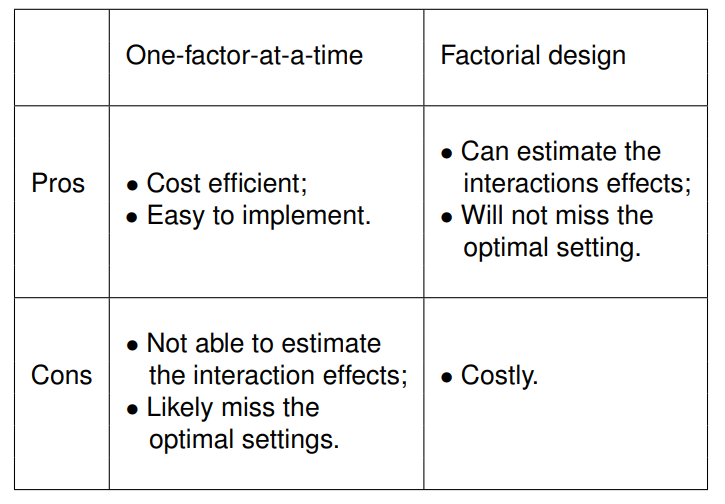


# Unit 24: Basics of Factorial Design


## Nominal the best:

- Keep the response as close to the target value as possible

A two step procedure for nominal-the-best problems is as follows:
- select levels of some factors to minimize var(y);
- select the level of a factor (or factors) not in Step 1 to move E(y) closer
to t: this factor is also called as **adjustment factor** has significant effect on the E(y) but not much on the Var(y)
- this kind of technique we are trying to optimize the response to take it closer to the nominal response.

## Larger/smaller the better:
- Select the levels of the factors to maximize (or minimize) E(y).
- Select the levels of the factors that are not used in Step 1 to
minimize var(y).

The steps are in reverse order because it is usually harder to increase or
decrease the response (y) in the LTB/STB problems so the step for
optimizing E(y) should be performed first.

# Unit 25: Basics of Factorial designs (III)

If there are $m$ replications in the game, then the total number of experiments performed are N = $m \times 2^k$ where $k$ is the number of treatments, and each treatment has 2 levels. In a generic case, where there would be $q$ levels for each factor $k$, then the number of experiments would be N = $m \times q^k$

## Orthogonal Factors:
1. Two factors are said to be orthogonal if all their level
combinations appear in the same number of runs.
2. A design is called orthogonal if all pairs of its factors are orthogonal.
3. If the coded variables take the values +1 and -1, then the factors $i$ and $j$ are orthogonal if the design matrix columns dot product is zero.

# Unit 26: Factorial Effects and Plots: Slide 185

## Epitaxial Layer Growth Experiment

In [129]:
# Data from the table
data = np.array([
    [14.506, 14.153, 14.134, 14.339, 14.953, 15.455, 14.59],
    [12.886, 12.963, 13.669, 13.869, 14.145, 14.007, 13.59],
    [13.926, 14.052, 14.392, 14.428, 13.568, 15.074, 14.24],
    [13.758, 13.992, 14.808, 13.554, 14.283, 13.904, 14.05],
    [14.629, 13.940, 14.466, 14.538, 15.281, 15.046, 14.65],
    [14.059, 13.989, 13.666, 14.706, 13.863, 13.357, 13.94],
    [13.800, 13.896, 14.887, 14.902, 14.461, 14.454, 14.40],
    [15.050, 14.361, 13.916, 14.431, 14.968, 15.294, 14.67],
    [14.249, 13.900, 13.065, 13.143, 13.708, 14.255, 13.72],
    [13.327, 13.457, 14.368, 14.405, 13.932, 13.552, 13.84],
    [13.605, 13.190, 13.695, 14.259, 14.428, 14.223, 13.90],
    [14.274, 13.904, 14.317, 14.754, 15.188, 14.923, 14.56],
    [13.775, 14.586, 14.379, 13.775, 13.382, 13.382, 13.88],
    [13.723, 13.914, 14.913, 14.808, 14.469, 13.973, 14.30],
    [14.031, 14.467, 14.675, 14.252, 13.658, 13.578, 14.11]])

planning_matrix = np.array([[-1, -1, -1, 1],
                            [-1, -1, -1, -1],
                            [-1, -1, 1, 1],
                            [-1, -1, 1, -1],
                            [-1, 1, -1, 1],
                            [-1, 1, -1, -1],
                            [-1, 1, 1, 1],
                            [-1, 1, 1, -1],
                            [1, -1, -1, 1],
                            [1, -1, -1, -1],
                            [1, -1, 1, 1],
                            [1, -1, 1, -1],
                            [1, 1, -1, 1],
                            [1, 1, -1, -1],
                            [1, 1, 1, 1],
                            [1, 1, 1, -1]])

# Unit 27: Viscocity Experiment

## Main and Interaction Effects Estimation with LSE

Lets try and estimate the main and interaction effects of A and B. Hence we need the following model:

$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_{12} x_1x_2$$

However we will be using a smaller planning and design matrix. The main and interaction effects are just twice the estimated LSE co-efficients.

In [130]:
design_matrix2 = np.array([[145, 148, 147, 140], [158, 152, 155, 152], [135, 138, 141, 139], [150, 152, 146, 149]])

In [131]:
planning_matrix2 = np.array([[-1, -1], [1, -1], [-1, 1], [1, 1]])
A, B = planning_matrix2[:, 0], planning_matrix2[:, 1]
AB = A*B
x = np.column_stack((np.ones(4), A, B, AB))

# since there is replication of experiments for 4 times, we stack the matrix
xnew = np.row_stack((x, x, x, x))

# create the data matrix
ynew = design_matrix2.T.reshape(-1, 1)

# now use linear regression formulae to find the values of the regression co-efficients
beta = np.dot(np.dot(np.linalg.inv(np.dot(xnew.T, xnew)), xnew.T), ynew)

# now predict the values of y
ypred = np.dot(xnew, beta)

# Unit 28: ANOVA in Factorial Designs

We start with deriving the ANOVA table for the above design matrix, where we have the sum of squares of the model as well as sum of squares of the residuals.

$$SS_{model} = \sum(\hat{y}_i - \bar{y})^2 $$
$$SS_{residual} = \sum(\hat{y}_i - y_i)^2  $$

## Continuing the Viscocity Experiment

In [132]:
sumModel = 0
sumResidual = 0
grand_mean = np.mean(ynew)
for i in range(len(ypred)):
  sumModel += (ypred[i] - grand_mean)**2
  sumResidual += (ypred[i] - ynew[i])**2

print(sumModel)
print(sumResidual)

[551.1875]
[100.25]


In [133]:
DOFM = 3 # number of predictors - 1
DOFR = 12 # total number of observations - number of parameters estimated
MSM = sumModel/DOFM
MSR = sumResidual/DOFR
FM = MSM/MSR

# here the F would be f.cdf(F_statistic, 3, 12)
# the parameters here are p, and N-p-1
# here p again is the number of parameters estimated - 1, and the N is the total number of experiments
pM = 1 - f.cdf(FM, 3, 12)

R2=sumModel/(sumResidual + sumModel)

# Unit 29: Unreplicated Experiments (I)

## Normal Plot

Here, we explore some methods other than the ANOVA and F-tests to find out which of the effects are significant enough. We expore using normal, half normal plots and the more formal lenth's method.

An array of estimates taken from the Epitaxial Layer Growth Experiment has been provided below:

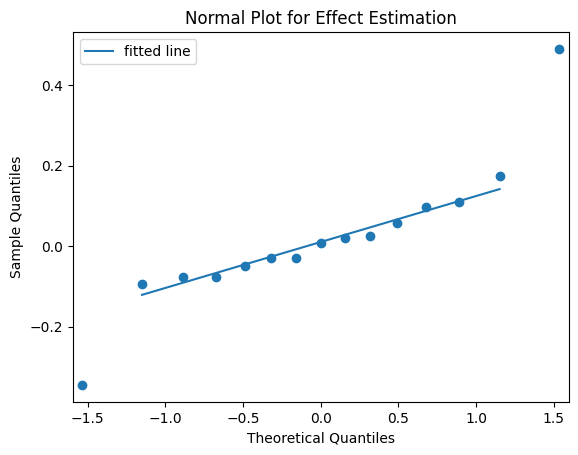

In [176]:
estimates = np.array([-0.078, 0.173, -0.078, 0.490, 0.008, -0.093, -0.05, 0.058, -0.03, -0.345, 0.098, 0.025, -0.030, 0.11, 0.02])
est_names = np.array(['A', 'B', 'C', 'D', 'AB', 'AC', 'AD', 'BC', 'BD', 'CD', 'ABC', 'ABD', 'ACD', 'BCD', 'ABCD'])
THRESHOLD = 0.3

# fit a straight line to estimates which lie below the THRESHOLD
fig = sm.qqplot(estimates)
ax = fig.axes[0]

x_data = ax.lines[0].get_xdata().reshape(-1, 1)
y_data = ax.lines[0].get_ydata().reshape(-1, 1)

x_data_new = x_data[abs(y_data) < THRESHOLD].reshape(-1, 1)
y_data_new = y_data[abs(y_data) < THRESHOLD].reshape(-1, 1)

# fit a linear model
model = LinearRegression().fit(x_data_new, y_data_new)
xpred = np.expand_dims(np.linspace(x_data_new.min(), x_data_new.max(), 100), 1)
ypred = model.predict(xpred)

plt.plot(xpred, ypred, label='fitted line')
plt.legend()
plt.title('Normal Plot for Effect Estimation');

# annotate the effects
#for i, label in enumerate(est_names):
#  plt.annotate(label, (x_data[i], y_data[i]), textcoords="offset points", xytext=(0,10), ha='center')

## Half Normal Plot

Half normal plot usually works well for at least 7 effects. For a $2^2$ design,
we only have $2^2 - 1 = 3$ effects, too few to produce meaningful plot for
visual judgment

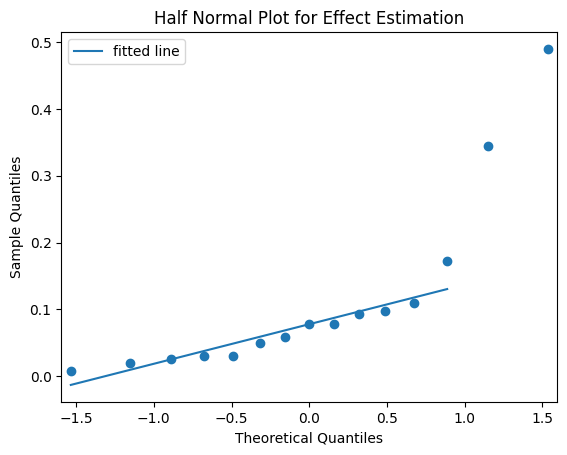

In [181]:
# fit a straight line to estimates which lie below the THRESHOLD
fig = sm.qqplot(abs(estimates))
ax = fig.axes[0]

x_data = ax.lines[0].get_xdata().reshape(-1, 1)
y_data = ax.lines[0].get_ydata().reshape(-1, 1)

x_data_new = x_data[abs(y_data) < THRESHOLD].reshape(-1, 1)
y_data_new = y_data[abs(y_data) < THRESHOLD].reshape(-1, 1)

# fit a linear model
model = LinearRegression().fit(x_data_new, y_data_new)
xpred = np.expand_dims(np.linspace(x_data_new.min(), x_data_new.max(), 100), 1)
ypred = model.predict(xpred)

plt.plot(xpred, ypred, label='fitted line')
plt.legend()
plt.title('Half Normal Plot for Effect Estimation');

# Unit 30: Lenth's Test

Slide 275 has a better implementation of the Lenth's Method

In [185]:
# first calculate median of absolute values of estimates: and then compute s0
estimates_abs = abs(estimates)
medn = np.median(estimates_abs)
s0 = 1.5*medn

In [189]:
# now compute the new estimate array, where e3stimates_new = estimates<2.5*s0
estimates_new = estimates_abs[estimates_abs < 2.5*s0]

# find PSE
PSE = 1.5 * np.median(estimates_new)

# calculate tPSE
tPSE = estimates/PSE

# check slide 225 for further info, I am not able to find Appendix H

# Unit 31: Epitaxial Layer Growth Experiment

Using the concepts developed in Unit 24 on the epiaxial layer growth experiment.

# Unit 32: Fractional Factorial Design: Motivation and Principles

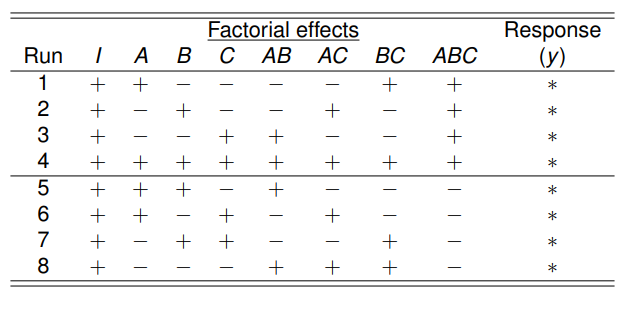

## Column Aliasing
If you observe carefully in the last table, the columns denoted by I and ABC are equal and so are A = BC, B = AC, or C = AB, hence these effects are called to be aliased. We can't determine the magnitude of the aliased effects, because it is like the condition where there are more variables than there are equations.

In such cases, we can ignore some parameters and then only choose some, just like in the above case we can ignore the effects like AB, AC, BC and ABC and choose to focus on I, A, B, C which means we only consider the bias parameter (or better can be called the grand average), and the main effects.

## Secondary Experiment Principles

Which factors to consider? Which to ignore? Three additional principles for experiment planning and design:
1. Hierarchical ordering principle:
  - Lower order effects are more likely to be important than higher
order effects.
  - Effects of the same order are equally likely to be important
2. Effect sparsity principle
  - The number of relatively important effects in a factorial experiment
is small.
3. Effect heredity principle
  - In order for an interaction to be significant, at least one of its parent
factors should be significant.

# Unit 33: Fractional Factorial Design: Design Generation

In the previous example, choose the runs with a plus sign in the I = ABC column(design generator). Called the** defining relation** and ABC called the **defining word** of the design. Follow the following design calculus:

1. I.I = I
2. A.A = I
3. A.I = A
4. AB = BA
5. I = ABC $⟹$ I.A = ABC.A = A.A BC = BC
6. I = ABC $⟹$ C.I = C.ABC = ABC.C = AB, and so on $\dots$


# Unit 34: Design Resolution

## Word Length

1. The number of the letters in a defining word is its word length. For instance, I = ABC is a three-letter design.

## Resolution III Design

- Smallest word length is 3
- $2^{3-1}$ III (4 runs) is a resolution III design
- Capability: main effects are aliased with 2 factor interactions

## Resolution IV Design

- $2^4-1$ IV (8 runs) design is a resolution IV design
- Capability: main effects are not aliased with other m.e.’s or 2 fi’s but
aliased with 3 fi.

## Resolution V Design

- $2^5-1$ V (16 runs) design is a resolution V design
- Capability: m.e. and 2 fi’s are aliased only with 3fi’s or higher order
interactions.

## Clear Effects

- We call a m.e. or 2 fi clear if none of its alias is a m.e. or a 2 fi.

## Srongly Clear Effects

- We call a m.e. or 2 fi strongly clear if none of its alias is a m.e., or a 2 fi, or a 3 fi.


Intuitively, a clear m.e. or 2 fi is readily to be estimated from a fractional
factorial design.


## Resolution vs. Effect Clarity

- Resolution III design: not all m.e.’s or not all the 2fi’s are clear;
- Resolution IV design: m.e.’s are clear but not all the 2 fi’s are clear.
- Resolution V design: m.e.’s are strongly clear, 2 fi’s clear.

# Unit 35: Filtration Rate Experiment

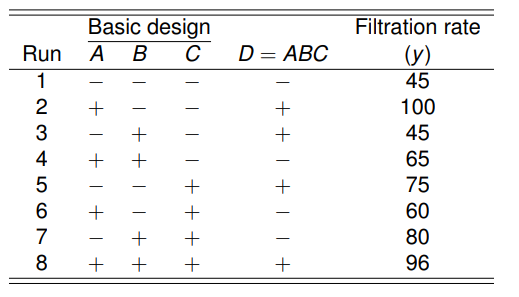

Check the following estimated effects (how did they arrive at this conclusion, first they checked all the main effects, and because B's main effect was the smallest, they decided that for estimating the interaction effects they would only use the 2-factor interaction effects which didnt include the factor B.

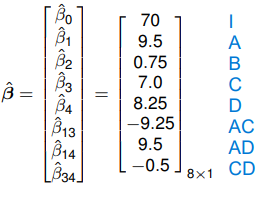

the corresponing half normal plot can be seen, and based on that it can reasoned which of the factors were neglected further after the regression model was fitted (which itself was fitted after neglecting some factors)

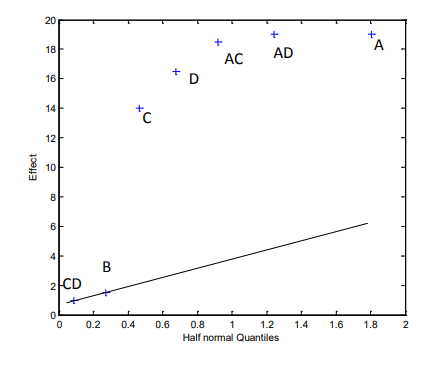

## Some Differences:

Compare the models below:

M1: $\hat{y} = 70 + 9.5x_1 + 7.0x_3 + 8.25x_4 - 9.25x_1x_3 + 9.5x_1x_4$
M2: $\hat{y} = 70.06 + 10.81x_1 + 4.94x_3 + 7.31x_4 - 9.06x_1x_3 + 8.31x_1x_4$

M1 is the model based on the fractional factorial design, whereas M2 is the model based on the full factorial design. Although the significant factors are the same in both models, the magnitudes of the co-efficients are different.


# Unit 36: Leaf Spring Experiments

Read with a fresh mind tomorrow

# Unit 37: Basics of Response Surface Methodology

Nothing much, just a short intro
